### layer 설명: https://zereight.tistory.com/227

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
# %matplotlib inline

### STEP 1: Load Fashion MNIST data

In [18]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# initialize the label name
labelNames = ["top", "trouser", "pullover", "dress", "coat", 
              "sandal", "shirt", "sneaker", "bag", "ankle boot"]

### STEP 2: Check MNIST data

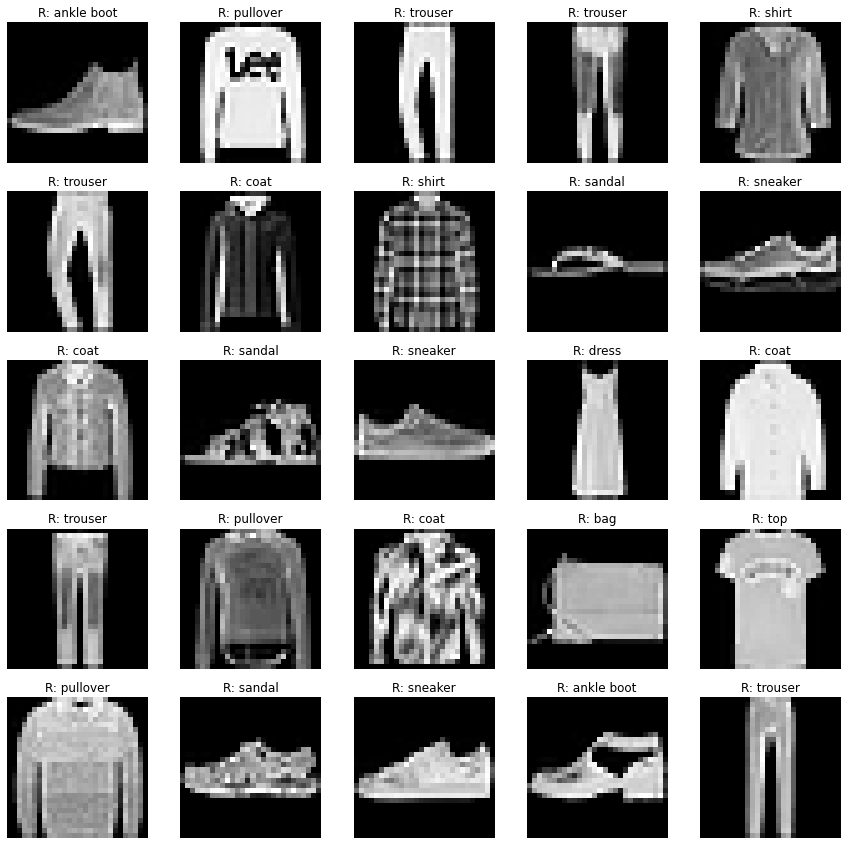

In [4]:
plt_row = 5
plt_col = 5

width = height = 28

plt.rcParams["figure.figsize"] = (15,15)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[int(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height), cmap='gray')
    sub_plt_title = 'R: ' + labelNames[testY[i]]
    sub_plt.set_title(sub_plt_title)
plt.show()

### STEP 3: 딥러닝을 위한 데이터 전처리

In [19]:
print(trainX.shape)
print(testX.shape)


# flatten (60000 * 28 * 28) images to a (60000 * 784) vector for each image
width = height = 28
num_pixels = width * height
trainX = trainX.reshape(60000, num_pixels).astype('float32') / 255.0 # 255로 나누는 이유 -> trainX는 0 ~ 255값만 존재합니다. 0 ~ 255를 0 ~ 1로 normalize 
testX = testX.reshape(10000, num_pixels).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
valX = trainX[50000:]
valY = trainY[50000:]
trainX = trainX[:50000]
trainY = trainY[:50000]

# one hot encode outputs
num_classes = 10 # labelNames 크기
trainY = tf.keras.utils.to_categorical(trainY, num_classes)
valY = tf.keras.utils.to_categorical(valY, num_classes)
testY = tf.keras.utils.to_categorical(testY, num_classes)

print ('train shape: \t', trainX.shape)
print ('valid shape: \t', valX.shape)
print ('test shape: \t', testX.shape)

(60000, 28, 28)
(10000, 28, 28)
train shape: 	 (50000, 784)
valid shape: 	 (10000, 784)
test shape: 	 (10000, 784)


### loss = https://keras.io/ko/losses/
### Optimizers: https://keras.io/ko/optimizers/

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def logistic_regression_model():
    # create model
    model = Sequential()
    # Dense 레이어는 입력과 출력을 모두 연결해줍니다.예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 
    # 각 연결선에는 가중치(weight)를 포함하고 있는데, 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다.
    model.add(Dense(num_classes, input_dim=num_pixels, kernel_initializer='normal', activation='softmax')) 
    # num_classes: 출력노드 개수
    # input_dim(num_pixels): 입력노드 개수
    # kernel_initializer: 가중치 초기화 방법(‘uniform’ : 균일 분포, normal’ : 가우시안 분포)
    # activation: 활성화 함수 설정
        # linear: 선형함수(default), 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다. 
        # relu: 입력이 '0'이 넘으면 입력값 그대로 출력, '0'이하이면 0을 출력, 은익층에 주로 쓰입니다. 
        # sigmoid: 0 ~ 1 사이의 실수를 출력, 이진 분류 문제에서 출력층에 주로 쓰입니다.
        # softmax: 0 ~ 1 사이의 숫자를 출력, 출력하는 값은 확률. 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.
        
    
    # compile model
    # SGD: 확률적 경사 하강법
    # decay: 업데이트마다 적용되는 학습률의 감소율입니다.
    # momentum: 관성의 방향을 고려해 진동과 폭을 줄이는 효과
    # nesterov: 모멘텀이 이동시킬 방향으로 미리 이동해서 그레이디언트를 계산. 불필요한 이동을 줄이는 효과
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc']) 
    # categorical_crossentropy: 범주형 교차 엔트로피(일반적인 분류)
    
    return model

### STEP 5: 첫 번째 인공지능 모델 학습!!!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 1s 614us/step - loss: 0.6353 - acc: 0.7879 - val_loss: 0.5216 - val_acc: 0.8224
Epoch 2/20
782/782 [==============================] - 0s 487us/step - loss: 0.4884 - acc: 0.8344 - val_loss: 0.4808 - val_acc: 0.8328
Epoch 3/20
782/782 [==============================] - 0s 481us/step - loss: 0.4609 - acc: 0.8436 - val_loss: 0.4588 - val_acc: 0.8389
Epoch 4/20
782/782 [==============================] - 0s 485us/step - loss: 0.4447 - acc: 0.8489 - val_loss: 0.4456 - val_acc: 0.8476
Epoch 5/20
782/782 [==============================] - 0s 480us/step - loss: 0.4356 - acc: 0.8517 - val_loss: 0.4

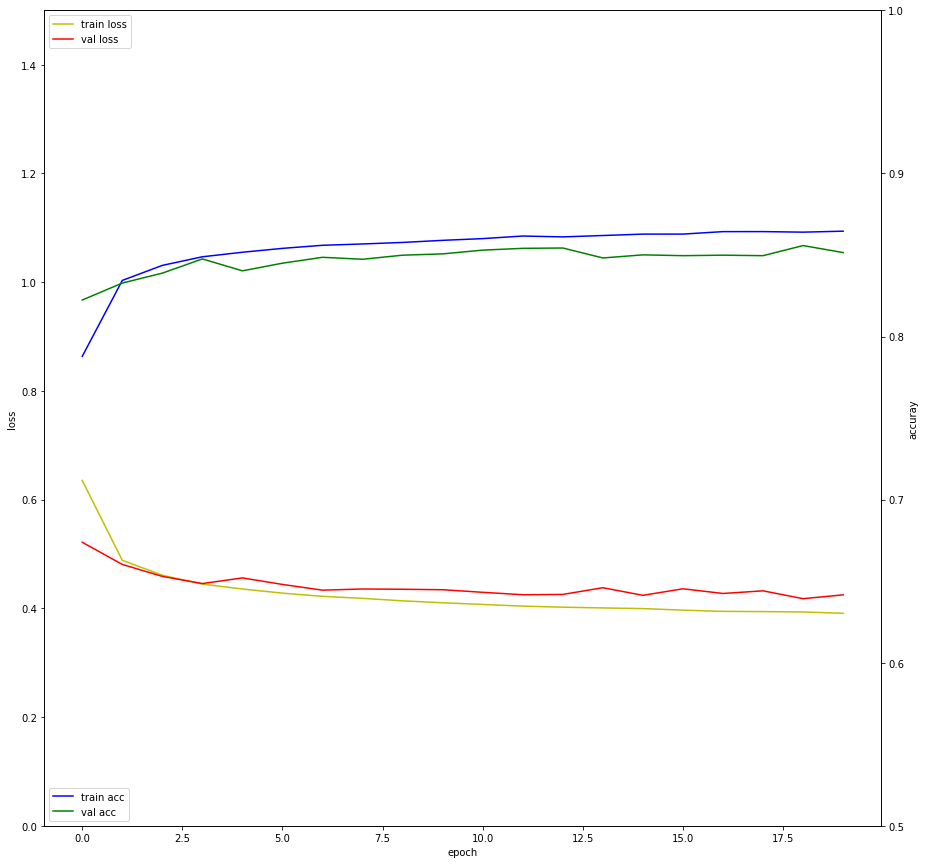

In [7]:
model = logistic_regression_model()
model.summary()
# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('logistic_regression_model.h5')

# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### STEP 6: 결과 확인 (테스트 데이터셋)

In [8]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Accuracy: 84.42%
Baseline Error: 15.58%


### STEP 7: 학습된 weight 살펴보기

W shape :  (784, 10)


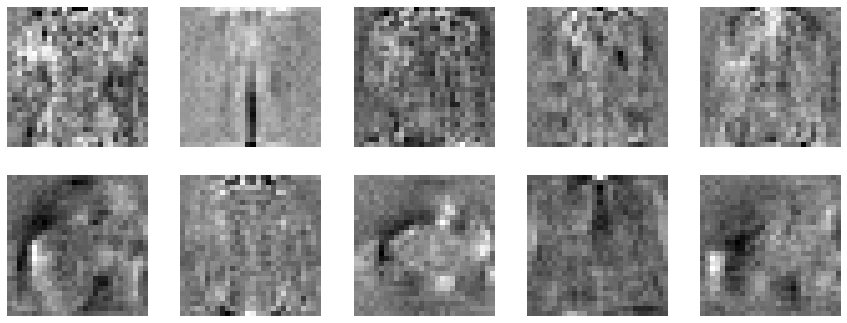

In [9]:
# Visualize weights
W = model.layers[0].get_weights()[0]
print("W shape : ", W.shape)

W = np.transpose(W, (1,0)) # 2차원 전치행렬

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W):
    plt.subplot(5, 5, ind + 1)
    im = val.reshape((28,28))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

### STEP 8: 두 번째 인공지능 모델 (Multi Layer Perceptron, MLP)

![Multi Layer Perceptron](../data/MLP.JPG "Multi Layer Perceptron")

In [20]:
def multi_layer_perceptron_model():
    # create model
    model = Sequential()
    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 1s 1ms/step - loss: 0.8710 - acc: 0.7194 - val_loss: 0.5998 - val_acc: 0.7864
Epoch 2/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5433 - acc: 0.8078 - val_loss: 0.5132 - val_acc: 0.8168
Epoch 3/20
782/782 [==============================] - 1s 1ms/step - loss: 0.4887 - acc: 0.8280 - val_loss: 0.4749 - val_acc: 0.8294
Epoch 4/20
782/782 [==============================] - 1s 1ms/step - loss: 0.4598 - acc: 0.8387 - val_loss: 0.4518 

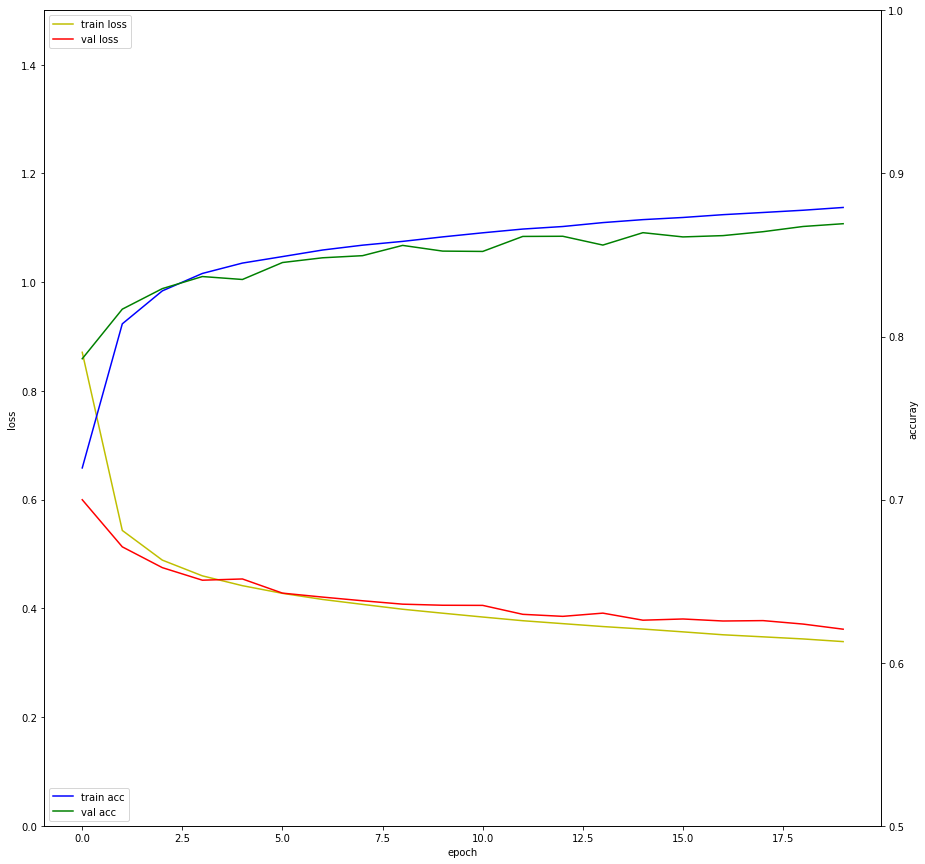

Baseline Accuracy: 86.25%
Baseline Error: 13.75%


In [21]:
# build the model
model = multi_layer_perceptron_model()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('multi_layer_perceptron_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

### STEP 9: 세 번째 인공지능 모델 (DEEP-MLP)

M![DEEP-MLP](../data/Deep_MLP.JPG "DEEP-MLP")

In [24]:
def deep_perceptron_initial_model():
    # create model
    model = Sequential()
    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid')) 
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
________________________________________________

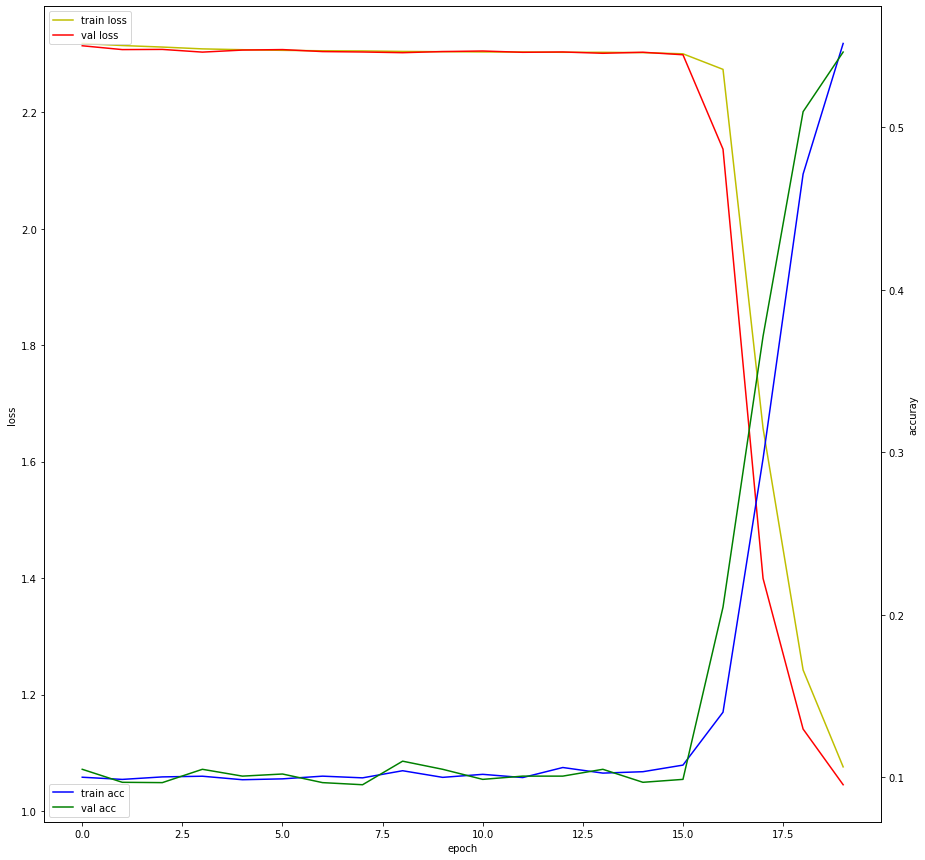

Baseline Accuracy: 54.17%
Baseline Error: 45.83%


In [25]:
# build the model
model = deep_perceptron_initial_model()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('deep_perceptron_initial_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

### STEP 10: 세 번째 인공지능 모델의 문제점 개선

### activation: 활성화 함수 설정
* linear: 선형함수(default), 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다. 
* relu: 입력이 '0'이 넘으면 입력값 그대로 출력, '0'이하이면 0을 출력, 은익층에 주로 쓰입니다. 
* sigmoid: 0 ~ 1 사이의 실수를 출력, 이진 분류 문제에서 출력층에 주로 쓰입니다.
* softmax: 0 ~ 1 사이의 숫자를 출력, 출력하는 값은 확률. 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

In [26]:
def deep_perceptron_model_with_relu():
    # create model
    model = Sequential()
    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))    
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
________________________________________________

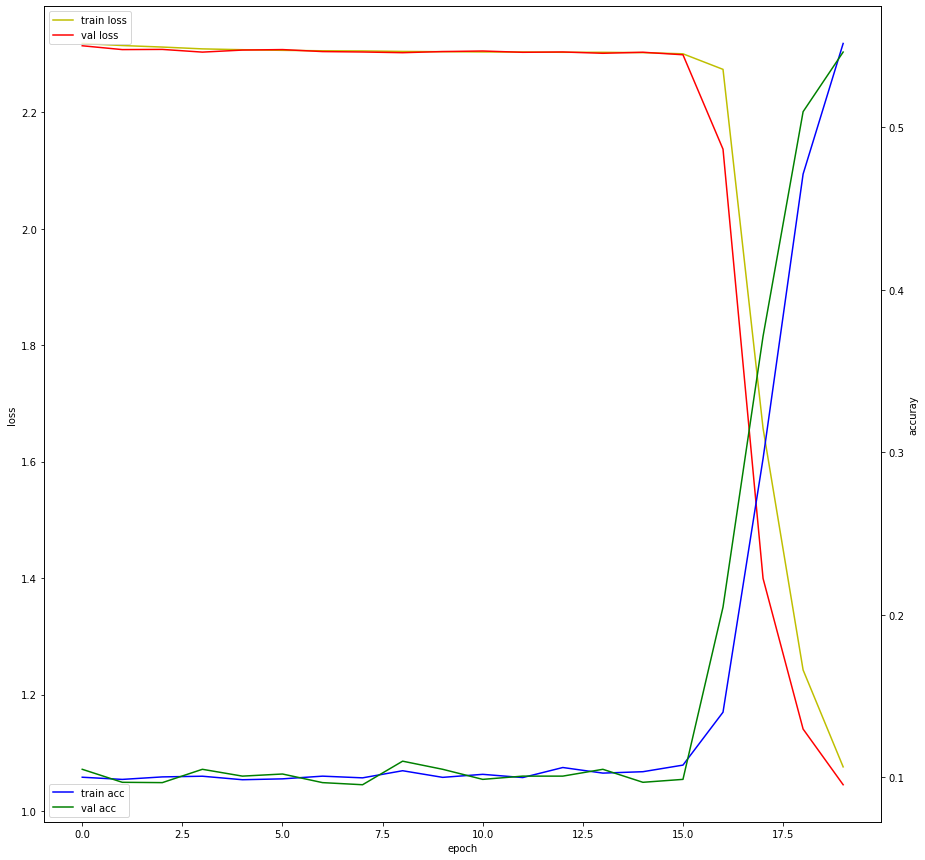

Baseline Accuracy: 54.17%
Baseline Error: 45.83%


In [27]:
# build the model
model = deep_perceptron_model_with_relu()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('deep_perceptron_model_with_relu.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

* Dropout: 이 기법이 적용되면 훈련 데이터에 대한 정확도가 떨어지지만 오버피팅을 억제하기 위한 기법입니다. 특정 확률로 신경망의 뉴런을 비활성화시켜 연산에서 제외시키는 방식입니다.

* 과적합: 훈련 데이터 기준으로 모델이 일반화되서 훈련데이터와 다른 테스트 데이트에는 적합하지 않는 현상(훈련데이터가 모든 경우를 수집할수 없다)

In [28]:
#  Hint
# 'Dropout': 이 기법이 적용되면 훈련 데이터에 대한 정확도가 떨어지지만 오버피팅을 억제하기 위한 기법입니다. # 즉, 특정 확률로 신경망의 뉴런을 비활성화시켜 연산에서 제외시키는 방식입니다.
# 과적합: 훈련 데이터 기준으로 모델이 일반화되서 훈련데이터와 다른 테스트 데이트에는 적합하지 않는 현상(훈련데이터가 모든 경우를 수집할수 없다)


from tensorflow.keras.layers import Dropout

def deep_perceptron_model_with_relu_dropout():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2)) # 인풋 데이터에 20%의 노드들을 무작위로 0으로 만드는 드롭아웃을 적용. -> 왜 모든층에 하는지?
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model
    

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)             

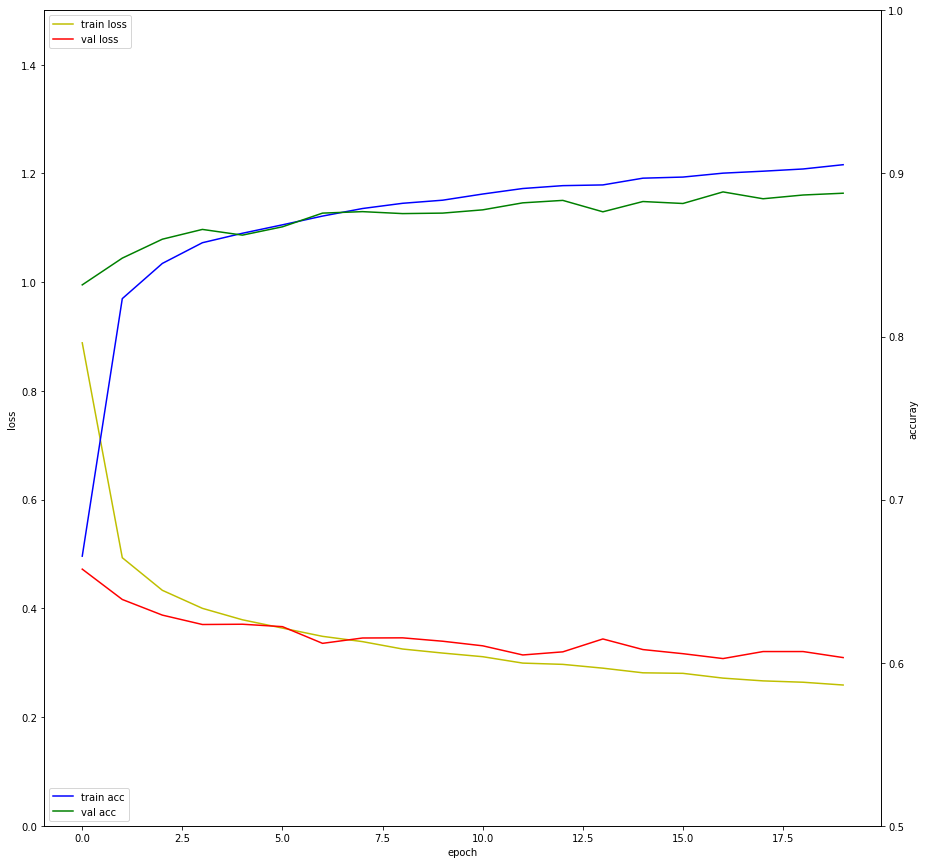

Baseline Accuracy: 88.33%
Baseline Error: 11.67%


In [29]:
# build the model
model = deep_perceptron_model_with_relu_dropout()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('deep_perceptron_model_with_dropout.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))